In [1]:
load("data/Fig6A.rdata")
library(ggsci)
library(scales)

In [2]:
show_cols=function (colours, borders = NULL, labels=FALSE,cex_label = 1) 
{
    ncol <- ncol(colours)
    nrow <- nrow(colours)
    #old <- par(pty = "m", mar = c(1, 2, 1, 1))
    #on.exit(par(old))
    plot(c(0, ncol), c(0, -nrow), type = "n", xlab = "", ylab = "", 
        axes = F,xaxt="n", yaxt="n")
    rect(col(colours) - 1, -row(colours) + 1, col(colours), -row(colours), 
        col = colours, border = borders)
    if (labels) {
        #axis(side=2, at=-row(colours)[,1] + 0.5, labels = FALSE)
        text(par("usr")[1]+2, -row(colours)[,1] + 0.5, rownames(colours), adj=1,
            cex = cex_label, pos = 2, xpd = TRUE)
    }
}

In [3]:
colors=as.matrix(data.frame(pal_material(palette = "blue")(5)[c(1,3,5)],# effective neoantigen
           pal_material(palette = "light-blue")(5)[c(1,3,5)], # clonal neoantigen
           pal_material(palette = "cyan")(5)[c(1,3,5)], #NK
           pal_material(palette="teal")(5)[c(1,3,5)], #CD160
           pal_material(palette = "pink")(5)[c(1,3,5)], # stemness
           pal_material(palette = "purple")(5)[c(1,3,5)]#shannon
))

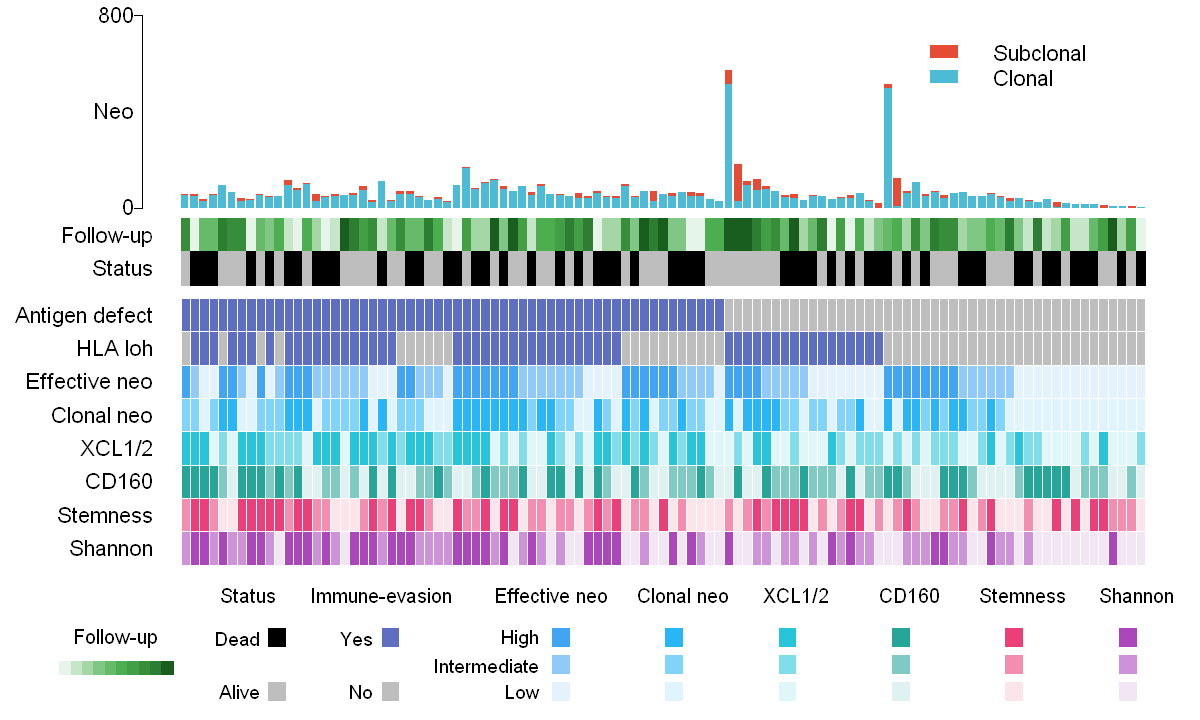

In [5]:
options(repr.plot.width=10,repr.plot.height=6)
layout(matrix(c(1,1,1,2,3,3,3,3,4,4), 10, 1, byrow = TRUE))
par(mar=c(0.5, 9, 1, 1),ps=11)

barplot(as.matrix(t(data)),col=pal_npg()(2)[2:1],las=1,legend.text = c("Clonal","Subclonal"),xaxt="n", yaxt="n",
       args.legend=list(bty="n",cex=1.8,border=NA),ylim=c(0,800),border=NA
)
axis(side=2, at=c(0,800), labels = FALSE)
text(par("usr")[1], c(0,400,800),c(0,"Neo",800),cex = 1.8, pos = 2, xpd = TRUE)
############################################################################

par(mar=c(0, 9, 0, 1),ps=11)
show_cols(data3,borders = data3,labels = TRUE,cex_label = 1.8)
######################################################################
par(mar=c(0, 9, 0, 1),ps=11)
show_cols(t(data2),borders = "white",labels = T,cex_label = 1.8)

#########################################################################
par(mar=c(0, 1, 0, 0),ps = 10)
plot(c(-8, 21), c(0,10), type = "n", xlab = "", ylab = "", 
        axes = F,xaxt="n", yaxt="n")
rect(rep(seq(from=5,to=20,by=3),each=3),rep(c(1,3,5),times=6),rep(seq(from=5.5,to=20.5,by=3),each=3),rep(c(2.5,4.5,6.5),times=6),col = colors,border="white")

text(x=4.7,y =c(1.75,3.75,5.75),c("Low","Intermediate","High"),adj = 1,cex=1.7)
text(x=c(5,8.5,11.5,14.5,17.5,20.5),y=9,c("Effective neo","Clonal neo","XCL1/2","CD160","Stemness","Shannon"),adj=0.5,cex=1.8)
rect(0.5,c(1,5),1,c(2.5,6.5),col=c("gray","#5B6BBFFA"),border="white",cex=1.7)
text(0.3,c(1.75,5.75),c("No","Yes"),adj=1,cex=1.7)
text(0.5,9,"Immune-evasion",cex=1.8)
rect(-2,c(1,5),-2.5,c(2.5,6.5),col=c("gray","black"),border="white",cex=1.7)
text(-2.7,c(1.75,5.75),c("Alive","Dead"),adj=1,cex=1.7)
text(-3,9,"Status",cex=1.8)
rect(seq(from=-8,to=-5.3,by=0.3),3,seq(from=-7.7,to=-5,by=0.3),4,col=pal_material(palette = "green")(10),border=pal_material(palette = "green")(10))
text(-6.5,5.75,"Follow-up",cex=1.8)